<h1>Supervised learning since we have data to test on?

In [1]:
import pandas as pd
import numpy as np

In [2]:
apple = pd.read_csv('apple.csv')
apple = apple[apple.columns[1:]]

In [5]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7189 entries, 0 to 7188
Data columns (total 9 columns):
app                 7189 non-null object
size                7189 non-null object
price               7189 non-null float64
rating_count        7189 non-null int64
rating_count_ver    7189 non-null int64
rating              7189 non-null float64
rating_ver          7189 non-null float64
content             7189 non-null object
category            7189 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 505.6+ KB


In [6]:
apple['type'] = apple['price'].apply(lambda x: 'Free' if x==0.00 else 'Paid')

In [7]:
apple['size'] = apple['size'].apply(lambda x: x.replace(',','') if ',' in str(x) else x).apply(float)

In [8]:
apple = apple[['app','size','price','type','category','content','rating','rating_count','rating_ver','rating_count_ver']]

In [9]:
apple.head()
#DV: rating - by version? visualization?
#IV: size, price (binary set), category, content

,app,size,price,type,category,content,rating,rating_count,rating_ver,rating_count_ver
0,PAC-MAN Premium,100.788,3.99,Paid,Games,4+,4.0,21292,4.5,26
1,Evernote - stay organized,158.579,0.00,Free,Productivity,4+,4.0,161065,3.5,26
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524,0.00,Free,Weather,4+,3.5,188583,4.5,2822
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512,0.00,Free,Shopping,12+,4.0,262241,4.5,649
4,Bible,92.774,0.00,Free,Books & Reference,4+,4.5,985920,5.0,5320


In [13]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7189 entries, 0 to 7188
Data columns (total 10 columns):
app                 7189 non-null object
size                7189 non-null float64
price               7189 non-null float64
type                7189 non-null object
category            7189 non-null object
content             7189 non-null object
rating              7189 non-null float64
rating_count        7189 non-null int64
rating_ver          7189 non-null float64
rating_count_ver    7189 non-null int64
dtypes: float64(4), int64(2), object(4)
memory usage: 561.7+ KB


In [11]:
google = pd.read_csv('google.csv')
google = google[google.columns[1:]]

In [12]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8196 entries, 0 to 8195
Data columns (total 9 columns):
app             8196 non-null object
rating          8196 non-null float64
rating_count    8196 non-null int64
size            7027 non-null float64
installs        8196 non-null int64
type            8196 non-null object
price           8196 non-null float64
content         8196 non-null object
category        8196 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 576.4+ KB


In [14]:
google = google[['app','size','price','type','category','content','rating','rating_count','installs']]

In [15]:
google.head()
#DV could be rating & installs
#IV: size, price (binary as well), category, content, type
#adjust for rating_count?

,app,size,price,type,category,content,rating,rating_count,installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,19.0,0.0,Free,Lifestyle,4+,4.1,159,10000
1,Coloring book moana,14.0,0.0,Free,Lifestyle,4+,3.9,967,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8.7,0.0,Free,Lifestyle,4+,4.7,87510,5000000
3,Sketch - Draw & Paint,25.0,0.0,Free,Lifestyle,12+,4.5,215644,50000000
4,Pixel Draw - Number Art Coloring Book,2.8,0.0,Free,Lifestyle,4+,4.3,967,100000


In [73]:
#some sizes are NaN
print(google['size'].size)
google['size'].count()
#about 1000 of them

8180


7011

In [16]:
googlereviews = pd.read_csv('googlereviews.csv')
googlereviews = googlereviews[googlereviews.columns[1:]]
googlereviews.head()

,app,review
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...
1,10 Best Foods for You,This help eating healthy exercise regular basis
2,10 Best Foods for You,Works great especially going grocery store
3,10 Best Foods for You,Best idea us
4,10 Best Foods for You,Best way


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

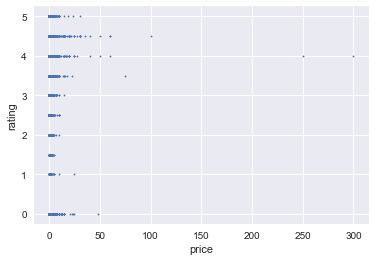

In [18]:
plt.scatter(apple['price'], apple['rating'], s=2)
plt.xlabel('price')
plt.ylabel('rating')

plt.show()

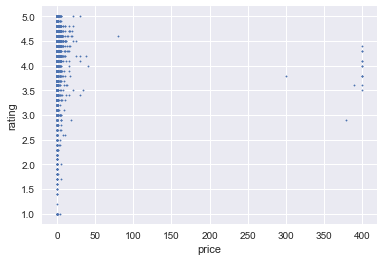

In [19]:
plt.scatter(google['price'], google['rating'], s=2)
plt.xlabel('price')
plt.ylabel('rating')

plt.show()

In [20]:
apple[apple.price > 50]

,app,size,price,type,category,content,rating,rating_count,rating_ver,rating_count_ver
115,Proloquo2Go - Symbol-based AAC,723.764,249.99,Paid,Education,4+,4.0,773,3.5,10
162,NAVIGON Europe,144.413,74.99,Paid,Navigation,4+,3.5,927,2.5,3
1136,Articulation Station Pro,425.919,59.99,Paid,Education,4+,4.5,294,5.0,130
1479,LAMP Words For Life,583.263,299.99,Paid,Education,4+,4.0,41,0.0,0
2181,Articulation Test Center Pro,174.737,59.99,Paid,Education,4+,4.5,29,0.0,0
2567,KNFB Reader,106.429,99.99,Paid,Productivity,4+,4.5,71,0.0,0
3237,FineScanner Pro - PDF Document Scanner App + OCR,63.974,59.99,Paid,Business,4+,4.0,100,4.5,4


In [21]:
google[google.price>50]

,app,size,price,type,category,content,rating,rating_count,installs
1675,Vargo Anesthesia Mega App,32.000,79.99,Paid,Medical,4+,4.6,92,1000
3177,most expensive app (H),1.500,399.99,Paid,Entertainment,4+,4.3,6,100
3303,💎 I'm rich,26.000,399.99,Paid,Lifestyle,4+,3.8,718,10000
3307,I'm Rich - Trump Edition,7.300,400.00,Paid,Lifestyle,4+,3.6,275,10000
4101,I am rich,1.800,399.99,Paid,Lifestyle,4+,3.8,3547,100000
4103,I am Rich Plus,8.700,399.99,Paid,Entertainment,4+,4.0,856,10000
4104,I am rich VIP,2.600,299.99,Paid,Lifestyle,4+,3.8,411,10000
4105,I Am Rich Premium,4.700,399.99,Paid,Finance,4+,4.1,1867,50000
4106,I am extremely Rich,2.900,379.99,Paid,Lifestyle,4+,2.9,41,1000
4107,I am Rich!,22.000,399.99,Paid,Finance,4+,3.8,93,1000


In [22]:
#take out price outliers
apple = apple[apple['price']<=50]
google = google[google['price']<=50]

<h1>Classification</h1>

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model 

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
model = tree.DecisionTreeRegressor(max_depth=3)
#model = DecisionTreeRegressor(max_depth = 3)

<a href='https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree'><span style='color:red'>Sklearn: mixed input variables?</span></a>

In [ ]:
#one_hot function
# encoded_apple = pd.get_dummies(apple[['type','category','content']],drop_first=True)
# encoded_apple

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

<h2>Apple</h2>

In [26]:
#transform categorical IV's into dummies
#type
#category
#content

le.fit(list(apple['category'].unique()))
apple['dummy_category'] = le.transform(apple['category'])
# le.inverse_transform(apple['category'])

le.fit(list(apple['content'].unique()))
apple['dymmy_content'] = le.transform(apple['content'])

le.fit(list(apple['type'].unique()))
apple['dymmy_type'] = le.transform(apple['type'])

apple.head()

,app,size,price,type,category,content,rating,rating_count,rating_ver,rating_count_ver,dummy_category,dymmy_content,dymmy_type
0,PAC-MAN Premium,100.788,3.99,Paid,Games,4+,4.0,21292,4.5,26,6,2,1
1,Evernote - stay organized,158.579,0.00,Free,Productivity,4+,4.0,161065,3.5,26,13,2,0
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524,0.00,Free,Weather,4+,3.5,188583,4.5,2822,19,2,0
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512,0.00,Free,Shopping,12+,4.0,262241,4.5,649,14,0,0
4,Bible,92.774,0.00,Free,Books & Reference,4+,4.5,985920,5.0,5320,0,2,0


<h3>Price --> Rating</h3>

In [31]:
#Rating as DV
#IV: size, price, category, content
#should not have price and type together as they directly correlate with one another
train_a, test_a = train_test_split(apple, test_size = 0.3)
x_train_a1 = train_a.iloc[0:,[1,2,10,11]]
y_train_a1 = train_a[['rating']]
x_test_a1 = test_a.iloc[0:,[1,2,10,11]]
y_test_a1 = test_a[['rating']]

In [32]:
x_train_a1.head()

,size,price,dummy_category,dymmy_content
2100,906.462,0.00,6,0
2756,45.313,0.00,7,2
4771,72.667,3.99,6,3
4072,977.830,5.99,6,3
7094,71.791,0.00,6,2


In [33]:
model.fit(x_train_a1,y_train_a1)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [ ]:
# !pip install pydotplus --upgrade

In [ ]:
from IPython.display import Image
import pydotplus

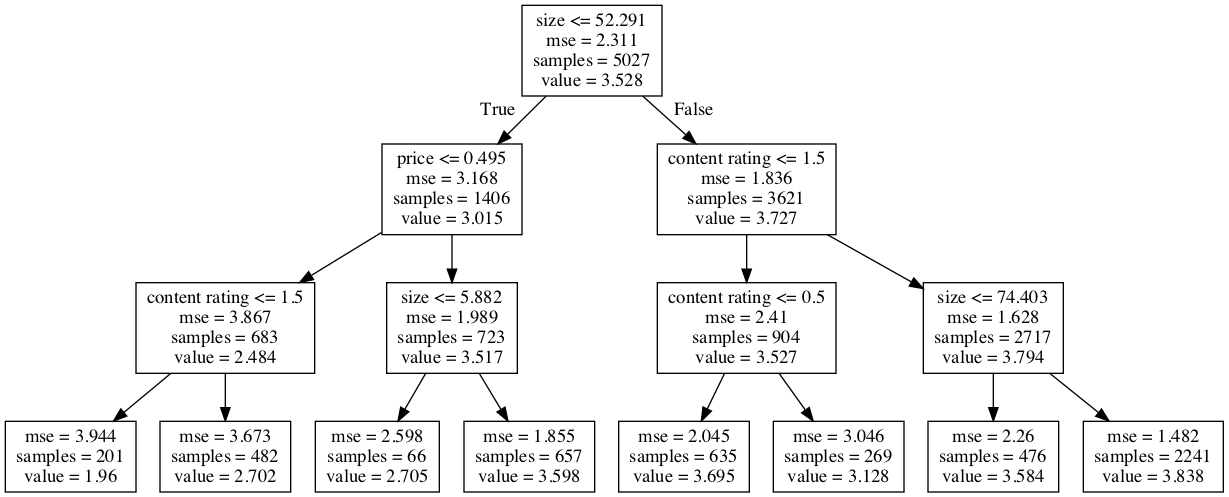

In [34]:
feature_names = ['size','price','category','content rating']
# from IPython.display import Image
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)
# import pydotplus

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

#Need to figure out how to convert back the dummies
#Manually draw the tree elsewhere?

<h3>Price Type --> Rating</h3>

In [39]:
#Rating as DV
#IV: size, type, category, content
#should not have price and type together as they directly correlate with one another

train_a, test_a = train_test_split(apple, test_size = 0.3)
x_train_a2 = train_a1.iloc[0:,[1,10,11,12]]
y_train_a2 = train_a1[['rating']]
x_test_a2 = test_a1.iloc[0:,[1,10,11,12]]
y_test_a2 = test_a1[['rating']]

In [40]:
x_train_a2.head()

,size,dummy_category,dymmy_content,dymmy_type
2100,906.462,6,0,0
2756,45.313,7,2,0
4771,72.667,6,3,1
4072,977.830,6,3,1
7094,71.791,6,2,0


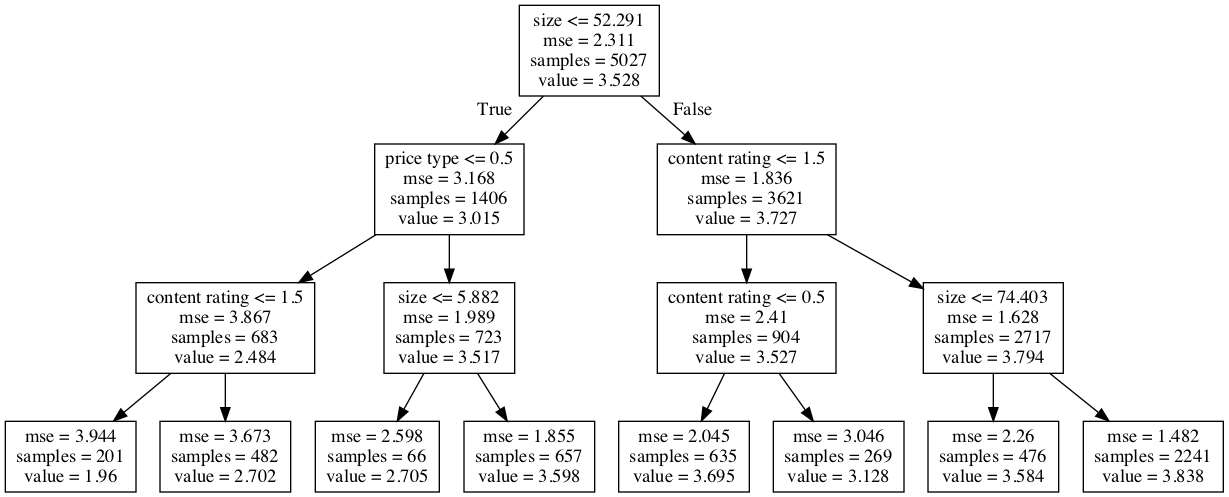

In [41]:
model.fit(x_train_a2,y_train_a2)

feature_names = ['size','category','content rating','price type']
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

<h2>Google</h2>

In [42]:
google.head()

,app,size,price,type,category,content,rating,rating_count,installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,19.0,0.0,Free,Lifestyle,4+,4.1,159,10000
1,Coloring book moana,14.0,0.0,Free,Lifestyle,4+,3.9,967,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8.7,0.0,Free,Lifestyle,4+,4.7,87510,5000000
3,Sketch - Draw & Paint,25.0,0.0,Free,Lifestyle,12+,4.5,215644,50000000
4,Pixel Draw - Number Art Coloring Book,2.8,0.0,Free,Lifestyle,4+,4.3,967,100000


In [43]:
#Convert categorical into dummies

le.fit(list(google['category'].unique()))
google['dummy_category'] = le.transform(google['category'])
# le.inverse_transform(apple['category'])

le.fit(list(google['content'].unique()))
google['dymmy_content'] = le.transform(google['content'])

le.fit(list(google['type'].unique()))
google['dymmy_type'] = le.transform(google['type'])

google.head()

,app,size,price,type,category,content,rating,rating_count,installs,dummy_category,dymmy_content,dymmy_type
0,Photo Editor & Candy Camera & Grid & ScrapBook,19.0,0.0,Free,Lifestyle,4+,4.1,159,10000,8,2,0
1,Coloring book moana,14.0,0.0,Free,Lifestyle,4+,3.9,967,500000,8,2,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8.7,0.0,Free,Lifestyle,4+,4.7,87510,5000000,8,2,0
3,Sketch - Draw & Paint,25.0,0.0,Free,Lifestyle,12+,4.5,215644,50000000,8,0,0
4,Pixel Draw - Number Art Coloring Book,2.8,0.0,Free,Lifestyle,4+,4.3,967,100000,8,2,0


In [44]:
#Rating & Installs as DV's
#IV: size, price/type, category, content
#should not have price and type together as they directly correlate with one another

train_g, test_g = train_test_split(google, test_size = 0.3)

<h3>Price --> Rating</h3>

In [54]:
"""Price & Rating"""
#size, price, category, rating

x_train_g1 = train_g.iloc[0:,[1,2,9,10]]
y_train_g1 = train_g[['rating']]
x_test_g1 = test_g.iloc[0:,[1,2,9,10]]
y_test_g1 = test_g[['rating']]

In [55]:
x_train_g1.head()

,size,price,dummy_category,dymmy_content
2292,33.0,0.0,17,2
419,24.0,0.0,15,1
2124,23.0,0.0,12,2
417,11.0,0.0,15,1
2052,NaN,0.0,14,2


In [74]:
# model.fit(x_train_g1,y_train_g1)

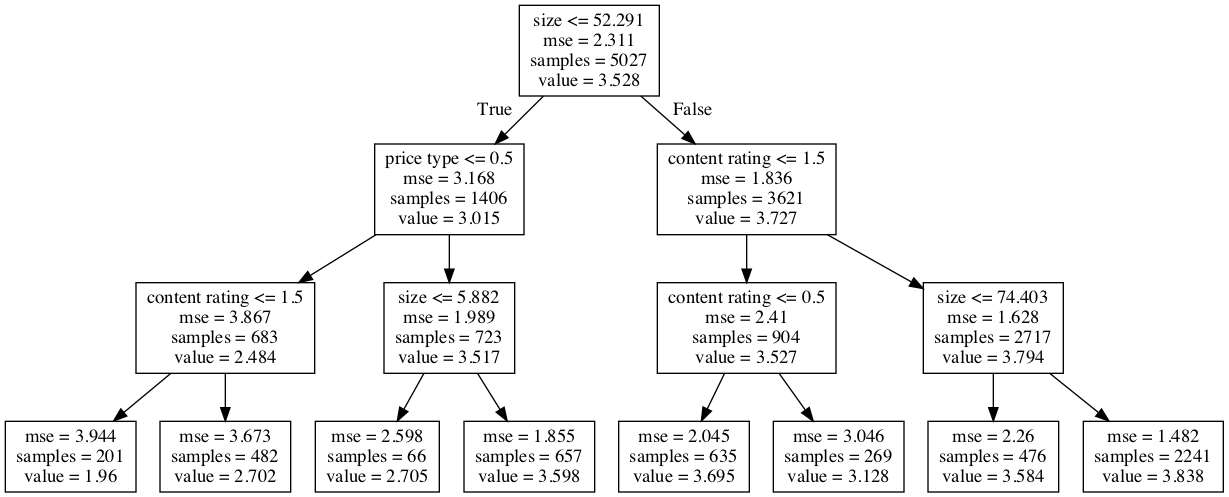

In [41]:
feature_names = ['size','price','category','content rating']
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

<h3>Price Type --> Rating

In [47]:
"""Type & Rating"""
x_train_g2 = train_g.iloc[0:,[1,9,10,11]]
y_train_g2 = train_g[['rating']]
x_test_g2 = test_g.iloc[0:,[1,9,10,11]]
y_test_g2 = test_g[['rating']]

In [48]:
x_train_g2.head()

,size,dummy_category,dymmy_content,dymmy_type
2292,33.0,17,2,0
419,24.0,15,1,0
2124,23.0,12,2,0
417,11.0,15,1,0
2052,NaN,14,2,0


In [76]:
# model.fit(x_train_g2,y_train_g2)

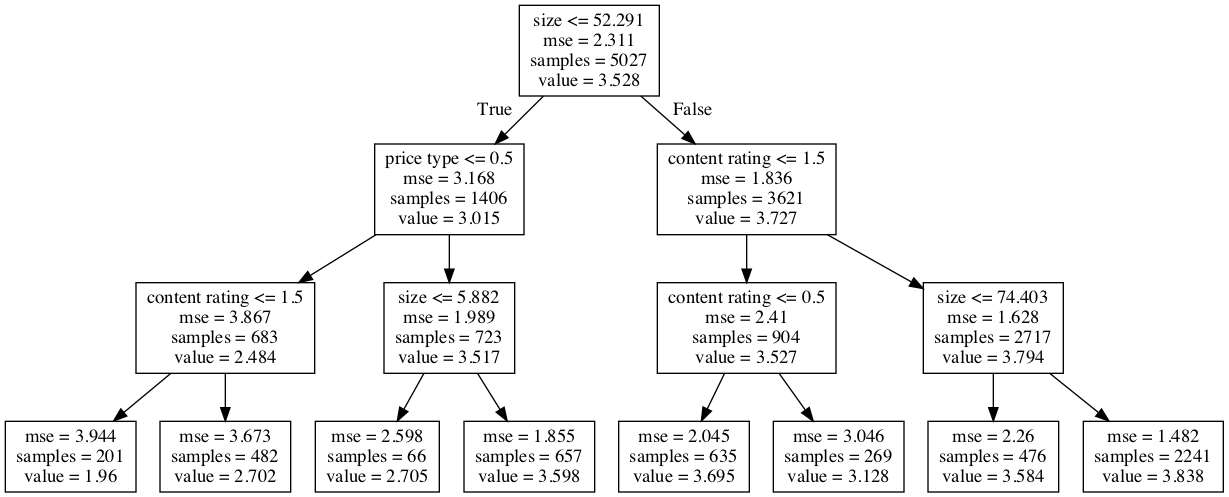

In [41]:
feature_names = ['size','category','content rating','price type']
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

<h3>Price --> Number of Installs</h3>

In [49]:
"""Price & Install"""
x_train_g3 = train_g.iloc[0:,[1,2,9,10]]
y_train_g3 = train_g[['installs']]
x_test_g3 = test_g.iloc[0:,[1,2,9,10]]
y_test_g3 = test_g[['installs']]

In [77]:
y_train_g3.head()

,installs
2292,5000000
419,100000
2124,5000000
417,10000000
2052,1000000


In [ ]:
model.fit(x_train_g3,y_train_g3)

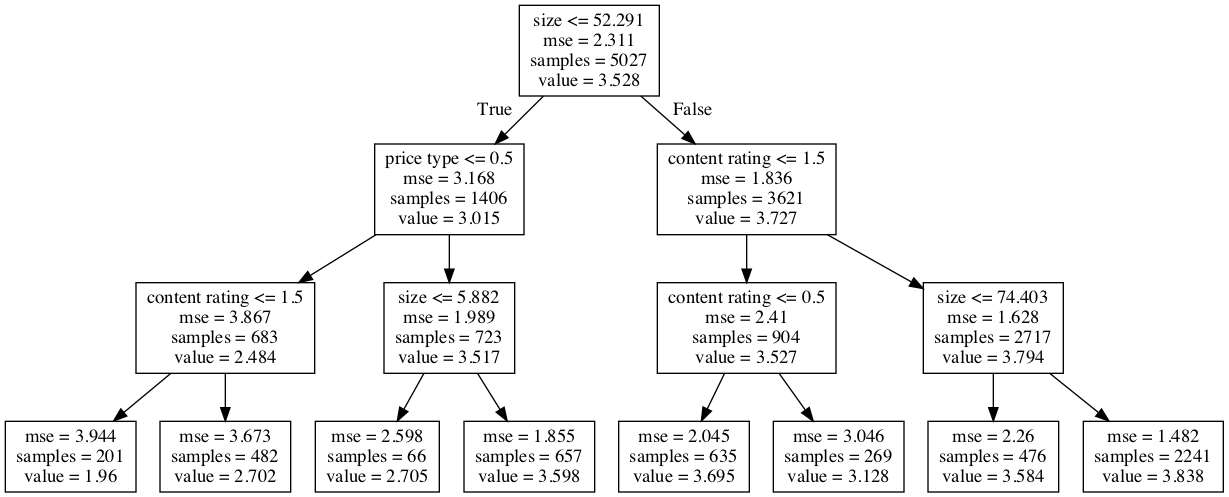

In [41]:
feature_names = ['size','price','category','content rating']
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

<h3>Price Type --> Number of Installs</h3>

In [56]:
"""Type & Rating"""
x_train_g4 = train_g.iloc[0:,[1,9,10,11]]
y_train_g4 = train_g[['installs']]
x_test_g4 = test_g.iloc[0:,[1,9,10,11]]
y_test_g4 = test_g[['installs']]

In [57]:
x_train_g4.head()

,size,dummy_category,dymmy_content,dymmy_type
2292,33.0,17,2,0
419,24.0,15,1,0
2124,23.0,12,2,0
417,11.0,15,1,0
2052,NaN,14,2,0


In [ ]:
model.fit(x_train_g4,y_train_g4)

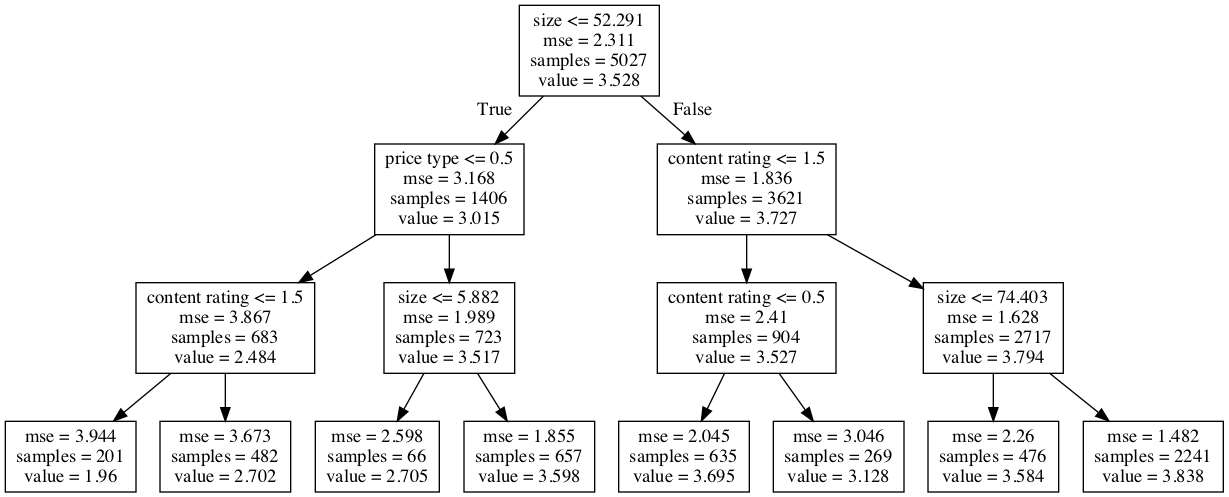

In [41]:
feature_names = ['size','category','content rating','price type']
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

<h1>Regression</h1>

In [ ]:
print(len(google.index))
print(len(apple.index))

In [ ]:
#apple

train, test = train_test_split(apple, test_size = 0.3) #30% as test set
x_train = train.iloc[0:,0:60]
y_train = train[60] #single out the output feature
x_test = test.iloc[0:,0:60]
y_test = test[60]
y_train #trained result by index